<a href="https://colab.research.google.com/github/seosumin/-/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
X = list(range(10))
Y = [1,1,2,4,5,7,8,9,9,10]
print(len(Y))
print(X)

10
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


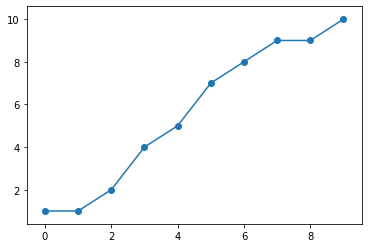

In [13]:
import matplotlib.pyplot as plt
plt.plot(X,Y)
plt.scatter(X,Y)

In [19]:
class H():
  def __init__(self, w):
    self.w = w
  
  def forward(self, x):
    return self.w * x

## 1. 가설을 정의하는 H를 코딩(여러 회귀선을 그어보는 단계)

def cost(h, X, Y):
  error = 0
  for i in range(len(X)):
    error +=(h.forward(X[i]) - Y[i])**2
  error = error / len(X)
  return error

## 각각의 H가 얼마나 좋은지를 정의하는 코스트를 코딩(회귀선과 실제 값간의 코스트를 구하는 단계)

h = H(4)
cost(h, X, Y)


222.2

[-10.0, -9.9, -9.8, -9.700000000000001, -9.600000000000001, -9.5, -9.4, -9.3, -9.200000000000001, -9.1, -9.0, -8.9, -8.8, -8.700000000000001, -8.6, -8.5, -8.4, -8.3, -8.200000000000001, -8.1, -8.0, -7.9, -7.800000000000001, -7.7, -7.6000000000000005, -7.5, -7.4, -7.300000000000001, -7.2, -7.1000000000000005, -7.0, -6.9, -6.800000000000001, -6.7, -6.6000000000000005, -6.5, -6.4, -6.300000000000001, -6.2, -6.1000000000000005, -6.0, -5.9, -5.800000000000001, -5.7, -5.6000000000000005, -5.5, -5.4, -5.300000000000001, -5.2, -5.1000000000000005, -5.0, -4.9, -4.800000000000001, -4.7, -4.6000000000000005, -4.5, -4.4, -4.3, -4.2, -4.1000000000000005, -4.0, -3.9000000000000004, -3.8000000000000003, -3.7, -3.6, -3.5, -3.4000000000000004, -3.3000000000000003, -3.2, -3.1, -3.0, -2.9000000000000004, -2.8000000000000003, -2.7, -2.6, -2.5, -2.4000000000000004, -2.3000000000000003, -2.2, -2.1, -2.0, -1.9000000000000001, -1.8, -1.7000000000000002, -1.6, -1.5, -1.4000000000000001, -1.3, -1.20000000000000

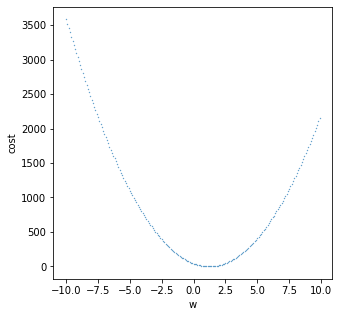

In [38]:
list_w = []
list_c = []
for i in range(-100, 100):
  w = i * 0.1
  h = H(w)
  c = cost(h, X, Y)
  list_w.append(w)
  list_c.append(c)
print(list_w)
print(list_c)

plt.figure(figsize=(5,5))
plt.xlabel('w')
plt.ylabel('cost')
plt.scatter(list_w, list_c, s=0.1)


1.2919715000000207 1.4605401424999989 1.2919715000000207 1.459999999999999
1.2455192450000139 0.626123930424221 1.2455192450000139 0.6258916691492209
1.2255447753500057 0.4718403728113236 1.2255447753500057 0.4717405004630736
1.2169557534005158 0.4433133430086884 1.2169557534005158 0.44327039789894096
1.2132624739622275 0.43803869519818633 1.2132624739622275 0.4380202288009949
1.2116743638037595 0.43706341281802064 1.2116743638037595 0.4370554722672283
1.2109914764356342 0.43688308310592705 1.2109914764356342 0.4368796686690864
1.2106978348673179 0.4368497401421613 1.2106978348673179 0.43684827193431974
1.2105715689929561 0.4368435750281606 1.2105715689929561 0.43684294369878884
1.2105172746669766 0.43684243509858184 1.2105172746669766 0.43684216362695194
1.2104939281068081 0.4368422243256027 1.2104939281068081 0.4368421075928019
1.2104838890859324 0.436842185353679 1.2104838890859324 0.4368421351585747
1.2104795723069592 0.43684217814777015 1.2104795723069592 0.4368421565638753
1.2104

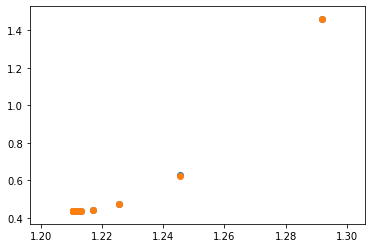

In [67]:
def cal_grad(w, cost):
  h = H(w)
  cost1 = cost(h, X, Y)
  eps = 0.0001
  h = H(w+ eps)
  cost2 = cost(h, X, Y)
  dcost = cost2 - cost1
  dw = eps
  grad = dcost / dw
  return grad, (cost1 + cost2) * 0.5

## 코스트를 줄이기 위한 방법으로 Gradient를 구하는 단계

def cal_grad2(w, cost):
  h = H(w)
  grad = 0
  for i in range(len(x)):
    grad += 2 * (h.forward(X[i]) - Y[i]) * X[i]
  grad = grad / len(X)
  c = cost(h, X, Y)
  return grad, c 


w1 = 1.4
w2 = 1.4
lr = 0.01

list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []
for i in range(100):
  grad, mean_cost = cal_grad(w1, cost)
  grad2, mean_cost2 = cal_grad2(w2, cost)

  w1 -= lr * grad
  w2 -= lr * grad
  list_w1.append(w1)
  list_w2.append(w2)
  list_c1.append(mean_cost)
  list_c2.append(mean_cost2)
  print(w1, mean_cost, w2, mean_cost2)

plt.scatter(list_w1, list_c1)
plt.scatter(list_w2, list_c2)